In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_recs(path: str):
    data = pd.read_csv(path, delimiter='\t', header=None)
    data.columns = ["user_id", "item_id", "rating", "timestamp"]
    return data

def read_users(path: str):
    users = pd.read_csv(path, delimiter='|', header=None)
    users.columns = ["user_id", "age", "gender", "occupation", "zip_code"]
    return users

def read_movies(path: str):
    movies = pd.read_csv(path, delimiter='|', header=None, encoding='latin-1')
    movies.columns = ["movie_id", "title", "release_date", "video_release_date", "IMBD_url"] + [f"genre_{x}" for x in range(19)]
    movies.release_date = pd.to_datetime(movies.release_date)
    return movies

def read_genre(path: str):
    genres = pd.read_csv(path, delimiter='|', header=None)
    genres.columns = ["genre", "id"]
    return genres

def read_occupation(path):
    occupation = pd.read_csv(path, delimiter='|', header=None)
    return occupation

users = read_users("../data/raw/ml-100k/u.user")
movies = read_movies("../data/raw/ml-100k/u.item")
recs = read_recs("../data/raw/ml-100k/u.data")
occupation = read_occupation("../data/raw/ml-100k/u.occupation")
genres = read_genre("../data/raw/ml-100k/u.genre")

In [3]:
genres

,genre,id
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


In [4]:
occupation[0].to_list()

['administrator',
 'artist',
 'doctor',
 'educator',
 'engineer',
 'entertainment',
 'executive',
 'healthcare',
 'homemaker',
 'lawyer',
 'librarian',
 'marketing',
 'none',
 'other',
 'programmer',
 'retired',
 'salesman',
 'scientist',
 'student',
 'technician',
 'writer']

## Lets analyze movies first

In [5]:
movies.size

40368

In [6]:
movies.head(5)

,movie_id,title,release_date,video_release_date,IMBD_url,genre_0,genre_1,genre_2,genre_3,genre_4,...,genre_9,genre_10,genre_11,genre_12,genre_13,genre_14,genre_15,genre_16,genre_17,genre_18
0,1,Toy Story (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


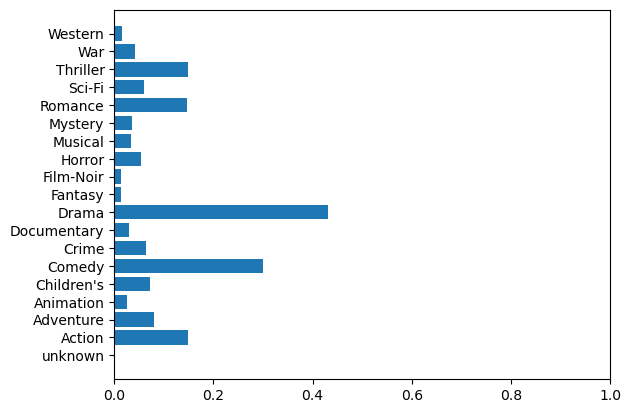

In [7]:
plt.xlim((0, 1))
plt.barh(genres.genre, movies[[f"genre_{x}" for x in range(19)]].mean())
plt.show()

/home/konstfed/miniconda3/envs/pmldl-recsys/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/konstfed/miniconda3/envs/pmldl-recsys/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/konstfed/miniconda3/envs/pmldl-recsys/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/konstfed/miniconda3/envs/pmldl-recsys/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='release_date'>

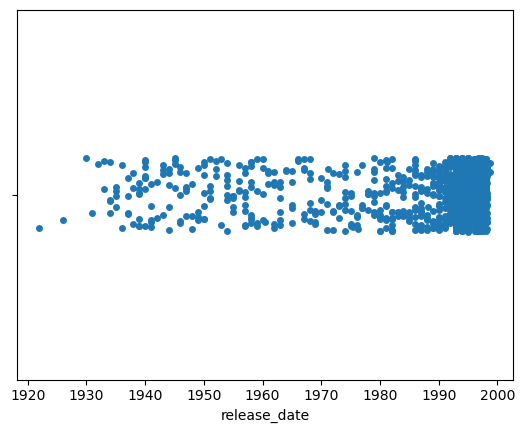

In [8]:
sns.stripplot(movies, x='release_date')

## Lets analyze users


In [9]:
users.head(5)

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [10]:
users.age.max()

73

In [11]:
users.isna().mean()

user_id       0.0
age           0.0
gender        0.0
occupation    0.0
zip_code      0.0
dtype: float64

In [12]:
users.zip_code.nunique()

795

/home/konstfed/miniconda3/envs/pmldl-recsys/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/konstfed/miniconda3/envs/pmldl-recsys/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/konstfed/miniconda3/envs/pmldl-recsys/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


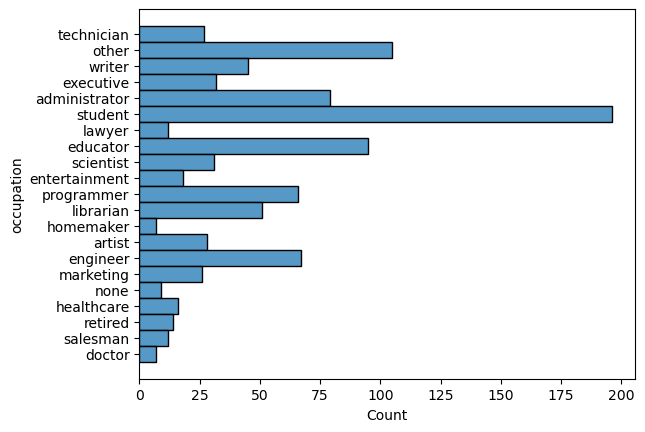

In [13]:
g = sns.histplot(users, y='occupation')
plt.show()

/home/konstfed/miniconda3/envs/pmldl-recsys/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/konstfed/miniconda3/envs/pmldl-recsys/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='Count'>

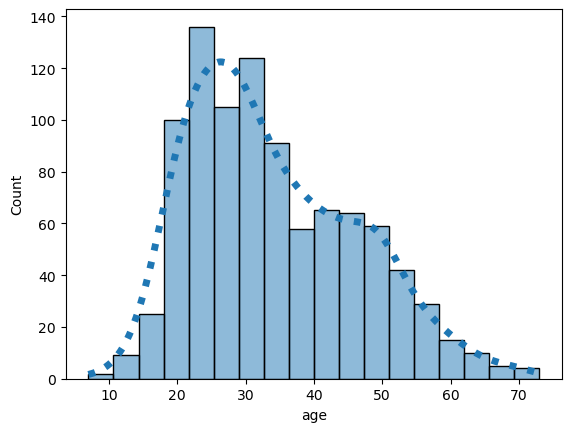

In [30]:
sns.histplot(users, x='age', kde=True, line_kws={'color': 'crimson', 'lw': 5, 'ls': ':'})

/home/konstfed/miniconda3/envs/pmldl-recsys/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/konstfed/miniconda3/envs/pmldl-recsys/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/konstfed/miniconda3/envs/pmldl-recsys/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/konstfed/miniconda3/envs/pmldl-recsys/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

<Axes: xlabel='age'>

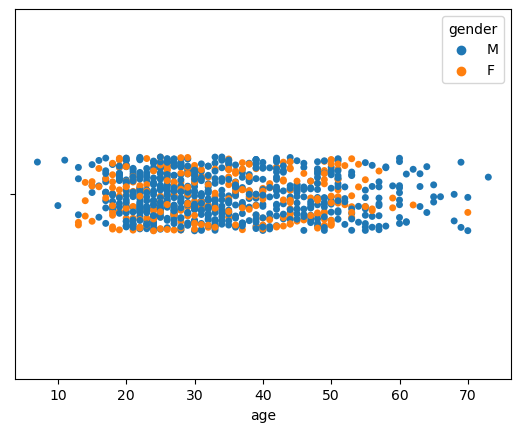

In [14]:
sns.stripplot(users, x='age', hue='gender')

In [15]:
users.gender.value_counts()

gender
M    670
F    273
Name: count, dtype: int64

In [31]:
users.zip_code.nunique()

795

## Lets analyze reviews

In [16]:
recs.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [17]:
recs.groupby("user_id").count().sort_values("rating")

,item_id,rating,timestamp
user_id,,,
36,20,20,20
34,20,20,20
926,20,20,20
873,20,20,20
418,20,20,20
...,...,...,...
276,518,518,518
450,540,540,540
13,636,636,636


/home/konstfed/miniconda3/envs/pmldl-recsys/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/konstfed/miniconda3/envs/pmldl-recsys/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='rating', ylabel='Count'>

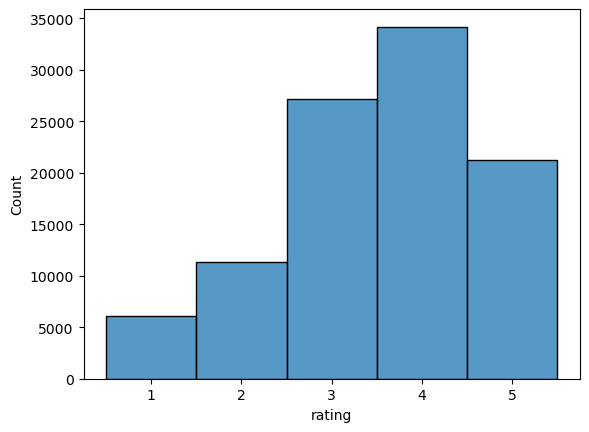

In [21]:
_to_plot = recs.copy()
_to_plot.rating = pd.Categorical(_to_plot.rating.astype(str), ['1', '2', '3', '4', '5'])
sns.histplot(_to_plot, x='rating',  )